# Import libraries and Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import Plot_functions as f2
%matplotlib inline

In [2]:
# Load data
df_origin = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv')

# Filter data

In [3]:
# Only analyze respondents who are either a developer by profession or
# not primarily a developer but write code sometimes as part of their work
df = df_origin[(df_origin['MainBranch']=='I am a developer by profession') | 
               (df_origin['MainBranch']=='I am not primarily a developer, but I write code sometimes as part of my work')]

# Method of handling missing value
- All sections in this notebook will handle missing value by removing it because the insights need to be based on fact results from descriptive statistics 

# Demographic

## Age

In [4]:
# Remove missing value 
df_age = df[['Age']][~df['Age'].isnull()]

# Remove value 'Prefer not to say' because it doesn't hold age information
df_age = df_age[['Age']][df_age['Age']!='Prefer not to say']

# Rename value
df_age['Age'].replace({'Under 18 years old': '<18',
                       '18-24 years old':'18-24',
                       '25-34 years old':'25-34',
                       '35-44 years old':'35-44',
                       '45-54 years old':'45-54',
                       '55-64 years old':'55-64',
                       '65 years or older':'>=65'
                            }, inplace=True)

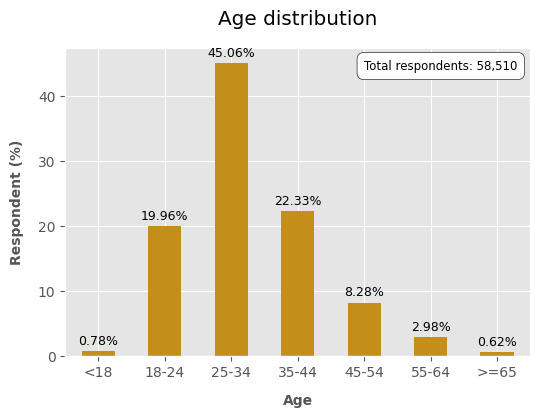

In [5]:
# Bar chart
age_order=['<18','18-24','25-34','35-44','45-54','55-64','>=65']
f2.percent_bar_chart(df = df_age,
                    col = 'Age',
                    total_respondent = df_age.shape[0],
                    title = 'Age distribution',
                    xlabel = 'Age',
                    ylabel = 'Respondent (%)',
                    x_order = age_order)


## Highest education

In [6]:
# Remove missing value 
df_EduLevel = df[['EdLevel']][~df['EdLevel'].isnull()]

# Rename education level
df_EduLevel['EdLevel'].replace({'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Bachelor’s degree',
                                'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master’s degree',
                                'Other doctoral degree (Ph.D., Ed.D., etc.)': 'Doctoral degree',
                                'Associate degree (A.A., A.S., etc.)':'Associate degree',
                                'Some college/university study without earning a degree':'Some college/university without degree',
                                'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)':'Secondary school',
                                'Professional degree (JD, MD, etc.)':'Professional degree'
                                    }, inplace=True)

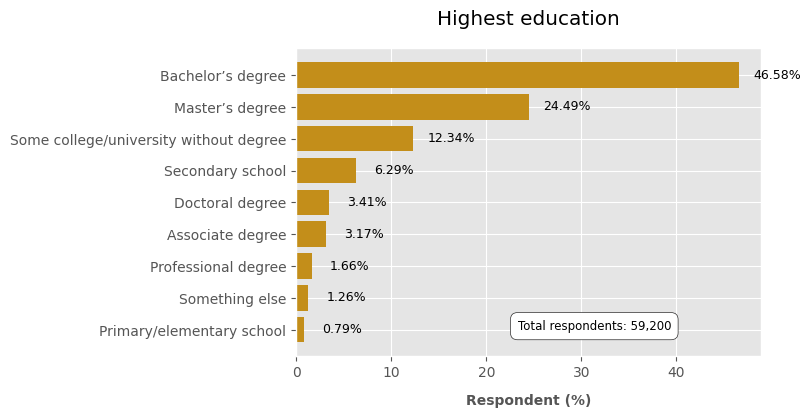

In [7]:
# Get value count for each of education level
val_count_df_EduLevel = df_EduLevel['EdLevel'].value_counts().reset_index().sort_values('count', ascending=True)
# Horizontal bar chart
f2.percent_barh_chart(val_count_df = val_count_df_EduLevel,
                      total_respondent = df_EduLevel.shape[0],
                      title = 'Highest education',
                      xlabel = 'Respondent (%)',
                      x_fig=6, y_fig=4)

## Years of work experience

In [8]:
# Remove missing value 
df_WorkExp = df[['WorkExp']][~df['WorkExp'].isnull()]

d:\STACKOVERFLOW-INSIGHT-2022\Plot_functions.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(i) for i in y_axis_values])
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:571: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) 

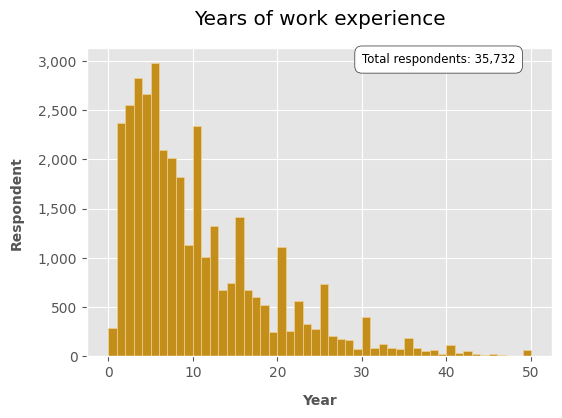

In [9]:
# Histogram
f2.histogram(df = df_WorkExp,
             col = 'WorkExp',
             bin=50,
             title = 'Years of work experience',
             xlabel = 'Year',
             ylabel = 'Respondent')

## Years of coding experience

In [10]:
# Create two new df and remove missing value
df_YearsCode = df[['YearsCode']][~df['YearsCode'].isnull()]
df_YearsCodePro = df[['YearsCodePro']][~df['YearsCodePro'].isnull()]
# Rename year of code into categories and store in a new column
df_YearsCode['YearsCode_Bin'] = df_YearsCode['YearsCode'].replace({'Less than 1 year': '0.5', #any number less than 1
                                                                   'More than 50 years':'55' #any number higher than 50
                                                                  })\
                                                         .astype(float)
df_YearsCodePro['YearsCodePro_Bin'] = df_YearsCodePro['YearsCodePro'].replace({'Less than 1 year': '0.5', #any number less than 1
                                                                               'More than 50 years':'55' #any number higher than 50
                                                                              })\
                                                                     .astype(float)
# Binning
def year_bin(row):
    if row < 1:
        row = '<1'
    elif row >=1 and row <=10:
        row = '1-10'
    elif row >=11 and row <=20:
        row = '11-20'
    elif row >=21 and row <=30:
        row = '21-30'
    elif row >=31 and row <=40:
        row = '31-40'
    elif row >=41 and row <=50:
        row = '41-50'
    elif row > 50:
        row = '>50'
    return row

df_YearsCode['YearsCode_Bin'] = df_YearsCode['YearsCode_Bin'].apply(lambda x: year_bin(x))
df_YearsCodePro['YearsCodePro_Bin'] = df_YearsCodePro['YearsCodePro_Bin'].apply(lambda x: year_bin(x))

# Create a new df to include value count for each of years of coding experience
year_order = ['<1','1-10','11-20','21-30','31-40','41-50','>50']
df_incl_edu = df_YearsCode['YearsCode_Bin'].value_counts().reindex(year_order)
df_excl_edu = df_YearsCodePro['YearsCodePro_Bin'].value_counts().reindex(year_order)
## Concat two df
df_edu_concat = pd.concat([df_incl_edu, df_excl_edu], axis=1).reset_index()
## Format df (col name and index)
df_edu_concat.columns = ['YoE','Include education','Exclude education']

df_edu_concat

,YoE,Include education,Exclude education
0,<1,247,1950
1,1-10,29956,31936
2,11-20,17357,10811
3,21-30,7208,4528
4,31-40,3251,1309
5,41-50,864,260
6,>50,111,33


d:\STACKOVERFLOW-INSIGHT-2022\Plot_functions.py:222: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(i) for i in y_axis_values])


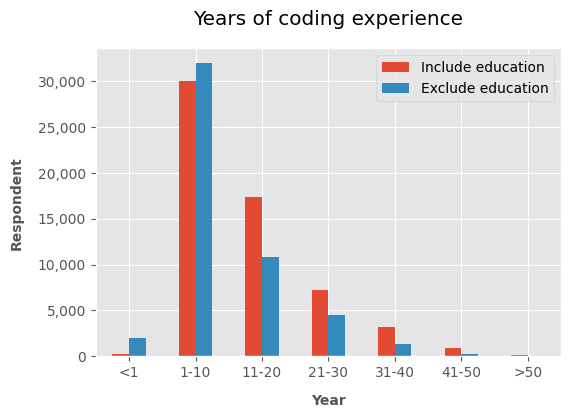

In [11]:
# Group bar chart
f2.group_bar_chart(val_count_df = df_edu_concat,
                   common_col = 'YoE',
                   title='Years of coding experience',
                   xlabel = 'Year',
                   ylabel = 'Respondent',
                   x_fig = 6, y_fig = 4)

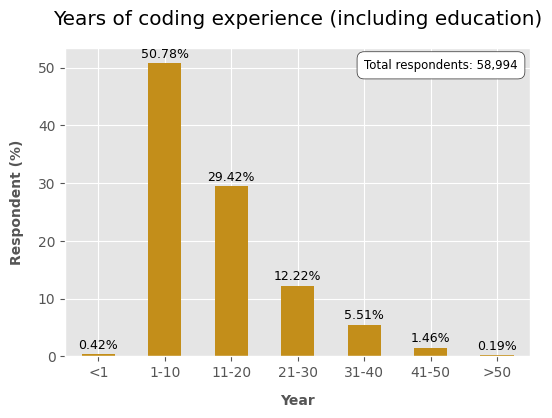

In [13]:
# Percent bar chart
f2.percent_bar_chart(df = df_YearsCode,
                     total_respondent = df_YearsCode.shape[0],
                     col = 'YearsCode_Bin',
                     title='Years of coding experience (including education)',
                     xlabel='Year',
                     ylabel='Respondent (%)',
                     x_order=year_order)

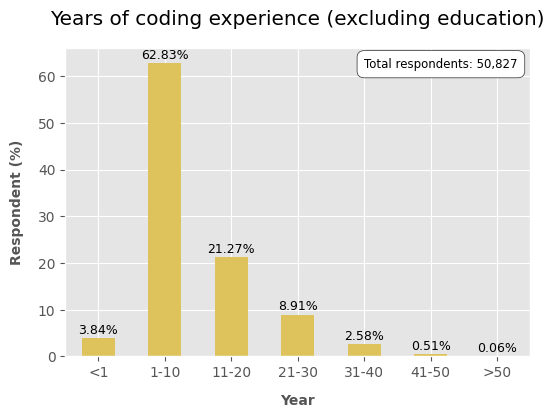

In [14]:
f2.percent_bar_chart(df = df_YearsCodePro,
                     col = 'YearsCodePro_Bin',
                     total_respondent = df_YearsCodePro.shape[0],
                     title='Years of coding experience (excluding education)',
                     xlabel='Year',
                     ylabel='Respondent (%)',
                     x_order=year_order,
                     bar_color='#dec25b')

## Country

In [22]:
# Remove missing value
country_df = df[['Country']][~df['Country'].isnull()]

# Rename country because some countries is too long to fit in the chart
country_df['Country'].replace({'United States of America':'USA',
                               'United Kingdom of Great Britain and Northern Ireland':'UK'},
                               inplace=True)

country_df

,Country
1,Canada
2,UK
3,Israel
4,USA
5,Germany
...,...
73261,France
73263,Nigeria
73264,USA
73265,USA


In [23]:
# Get number of developers for each country
val_count_df_country = country_df['Country'].value_counts().reset_index()
top_n_countries = val_count_df_country['Country'].to_list()[:11]
remain_n_countries = val_count_df_country['Country'].shape[0] - len(top_n_countries)
val_count_df_country['Country'] = val_count_df_country['Country'].apply(lambda x: 'Other countries ({0})'.format(remain_n_countries) if x not in top_n_countries else x)
val_count_df_country = val_count_df_country.groupby('Country').sum().reset_index()
val_count_df_country

,Country,count
0,Brazil,1869
1,Canada,2094
2,France,1990
3,Germany,4630
4,India,4960
5,Italy,1296
6,Netherlands,1356
7,Other countries (164),23184
8,Poland,1450
9,Spain,1372


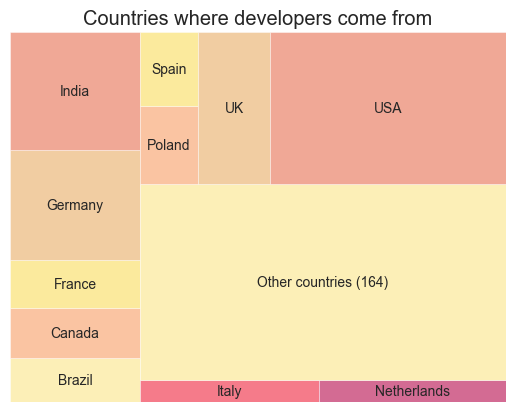

In [33]:
# Tree map
## Set seaborn plot style
sns.set_style(style="whitegrid")
## Proportions of the categories
sizes = val_count_df_country["count"].values
label = val_count_df_country["Country"]
## Color palette
colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c']
squarify.plot(sizes=sizes, label=label, alpha=0.6,color=colors).set(title='Countries where developers come from')
plt.axis('off')
plt.show()